### This script provides a testrun for implementing fastMONAI and U-net

In [46]:
import fastMONAI
from fastMONAI.vision_all import *
from monai.networks.nets import UNet
from monai.losses import DiceLoss

In [47]:
 #If GPU is available 
torch.cuda.is_available()
device = torch.device("cuda")
print(device)

cuda


In [48]:
fastMONAI.__version__

'0.4.0.2'

### Loading in the LIDC-IDRI dataset

In [49]:
lidc_df = pd.read_csv('nifti_ct_and_seg_paths.csv')
lidc_df.head()

,Patient ID,CT NIfTI path,Segmented NIfTI path
0,LIDC-IDRI-0017,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0017/LIDC-IDRI-0017.nii,/home/heris/data/RAW/LIDC-IDRI-segmented/LIDC-IDRI-0017/LIDC-IDRI-0017_seperated.nii
1,LIDC-IDRI-0007,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0007/LIDC-IDRI-0007.nii,/home/heris/data/RAW/LIDC-IDRI-segmented/LIDC-IDRI-0007/LIDC-IDRI-0007_seperated.nii
2,LIDC-IDRI-0013,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0013/LIDC-IDRI-0013.nii,/home/heris/data/RAW/LIDC-IDRI-segmented/LIDC-IDRI-0013/LIDC-IDRI-0013_seperated.nii
3,LIDC-IDRI-0012,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0012/LIDC-IDRI-0012.nii,/home/heris/data/RAW/LIDC-IDRI-segmented/LIDC-IDRI-0012/LIDC-IDRI-0012_seperated.nii
4,LIDC-IDRI-0006,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0006/LIDC-IDRI-0006.nii,/home/heris/data/RAW/LIDC-IDRI-segmented/LIDC-IDRI-0006/LIDC-IDRI-0006_seperated.nii


In [50]:
#Segmented are set to the true label
lidc_y = lidc_df.iloc[:,1]
lidc_labels = lidc_y.to_numpy()
lidc_labels

array(['/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0017/LIDC-IDRI-0017.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0007/LIDC-IDRI-0007.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0013/LIDC-IDRI-0013.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0012/LIDC-IDRI-0012.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0006/LIDC-IDRI-0006.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0014/LIDC-IDRI-0014.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0018/LIDC-IDRI-0018.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0005/LIDC-IDRI-0005.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0001/LIDC-IDRI-0001.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0011/LIDC-IDRI-0011.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0002/LIDC-IDRI-0002.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0015/LIDC-IDRI-0015.nii',
       '/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0003/LIDC-IDRI-0003.nii',
       '/home/heris/data/

In [51]:
med_dataset = MedDataset(img_list=lidc_labels, dtype=MedMask, max_workers=1)

med_dataset

The volumes in this dataset have different orientations. Recommended to pass in the argument reorder=True when creating a MedDataset object for this dataset


,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_-2000,voxel_count_-1999,...,voxel_count_6690,voxel_count_6703,voxel_count_6781,voxel_count_6787,voxel_count_6791,voxel_count_6797,voxel_count_6839,voxel_count_6854,voxel_count_6868,voxel_count_6916
0,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0017/LIDC-IDRI-0017.nii,512,512,238,1.0,1.0,1.0,LPS+,4874509.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0007/LIDC-IDRI-0007.nii,512,512,145,1.0,1.0,1.0,PRS+,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0013/LIDC-IDRI-0013.nii,512,512,125,1.0,1.0,1.0,PRS+,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0012/LIDC-IDRI-0012.nii,512,512,128,1.0,1.0,1.0,PRS+,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/home/heris/data/RAW/LIDC-IDRI/LIDC-IDRI-0006/LIDC-IDRI-0006.nii,512,512,133,1.0,1.0,1.0,PRS+,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
resample, reorder = med_dataset.suggestion() 
resample, reorder



([1.0, 1.0, 1.0], False)

In [53]:
batch_size = 4

In [54]:
img_size = med_dataset.get_largest_img_size(resample=resample) #Why do we do this?
img_size

[512.0, 512.0, 305.0]

In [55]:
#Setting a smaller size to use for cropping the images
size = [160,160,128]

In [56]:
item_tfms = [ZNormalization(), PadOrCrop(size), RandomAffine(scales=0, degrees=5)] 

In [57]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(valid_pct=0.1, seed=42), 
                      get_x=ColReader('CT NIfTI path'),
                      get_y=ColReader('Segmented NIfTI path'),
                      item_tfms=item_tfms, 
                      reorder=reorder, 
                      resample=resample) 

In [58]:
dls = dblock.dataloaders(lidc_df, bs=batch_size) 

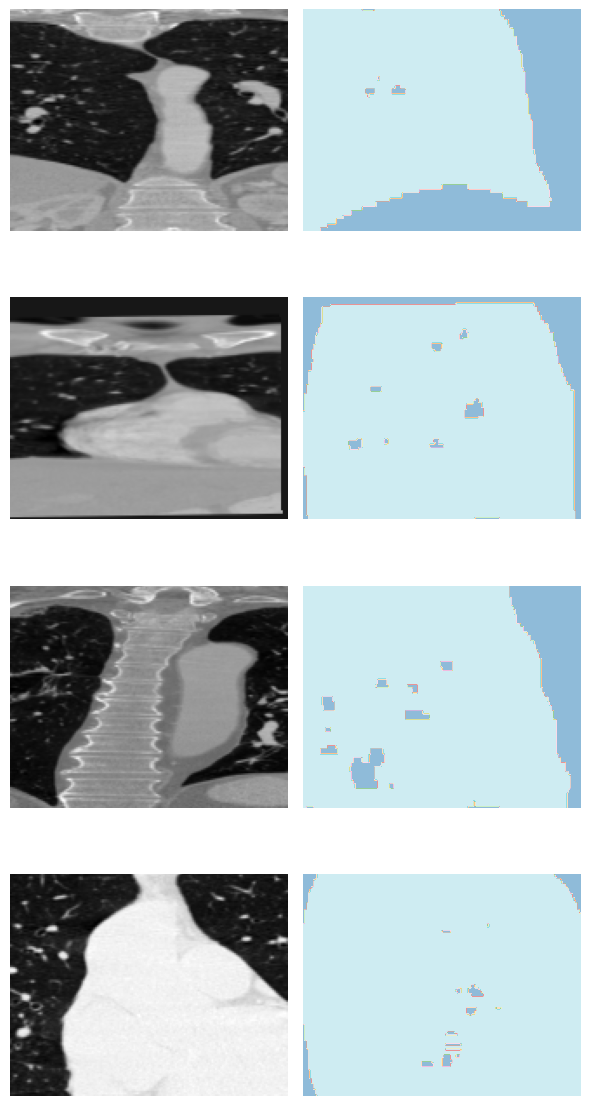

In [64]:
#Visualizing the training data (to the left) and their corresponding mask (to the right)
dls.show_batch(anatomical_plane=0) 

In [60]:
#Setting the model to be a 3D U-Net
model = UNet(spatial_dims=3, in_channels=1, out_channels=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), num_res_units=2)
model = model.model 

In [61]:
#Loss function is set to be diceloss
loss_func = CustomLoss(loss_func=DiceLoss(sigmoid=True))

In [62]:
#The learning is the instance of the model that is actually trained for segmentation
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=binary_dice_score)

In [63]:
learn.lr_find()

KeyboardInterrupt: 